In [224]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv


## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

In [225]:
# Your code here, along with reasoning

In [226]:
# Importing the training and testing data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [227]:
train.head()

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,85.792005,8067.786265,20.718243,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19
1,939316,Astro Saga in the Cosmos,Documentary,Drama,Crime,2023,Japanese,USA,PG,6.178134e+06,...,80.437724,750.473993,24.262058,655.016451,4,91.867209,85.750069,1.601333e+06,195.900521,NaN
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,82.882434,77701.229657,10.776592,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,NaN,...,80.022574,4411.172846,11.376984,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,72.209335,11678.765250,6.219910,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08


In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             800000 non-null  int64  
 1   title                  800000 non-null  object 
 2   content_type           800000 non-null  object 
 3   genre                  800000 non-null  object 
 4   sub_genre              800000 non-null  object 
 5   release_year           800000 non-null  int64  
 6   language               800000 non-null  object 
 7   country_of_origin      800000 non-null  object 
 8   content_age_rating     800000 non-null  object 
 9   budget                 759925 non-null  float64
 10  runtime                800000 non-null  float64
 11  imdb_rating            760066 non-null  float64
 12  streamly_rating        800000 non-null  float64
 13  completion_rate        800000 non-null  float64
 14  total_views            800000 non-nu

The attributes:
1. budget
2. imdb_rating
3. revenue
4. critics_score
5. user_engagement_score
6. user_retention

have missing / null values in them.

In [229]:
df_nulls = train[train.isnull().any(axis=1)]

print(df_nulls)

        content_id                                          title  \
1           939316                       Astro Saga in the Cosmos   
3           215181                  The Artifact of Savage Zenith   
8            86380                      Hacking the Opulent Quest   
10          919153     Steampunk Phenomenon in the Land of Dreams   
13          582279                           The Ethereal Mystery   
...            ...                                            ...   
799993       10485               Crafting the Savage Codex (580Q)   
799995      275603  Savage Mirage: A Post-Apocalyptic Tale (DN2X)   
799996      589165     The Nanotech Saga: A Gothic Journey (D0C3)   
799997      725081                Fusion Zenith: A Dystopian Tale   
799999      421922                         The Mystic Myth (E0NW)   

       content_type     genre   sub_genre  release_year  language  \
1       Documentary     Drama       Crime          2023  Japanese   
3             Movie   Romance    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


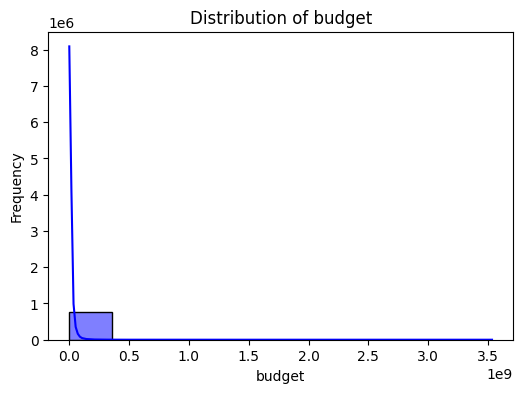

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


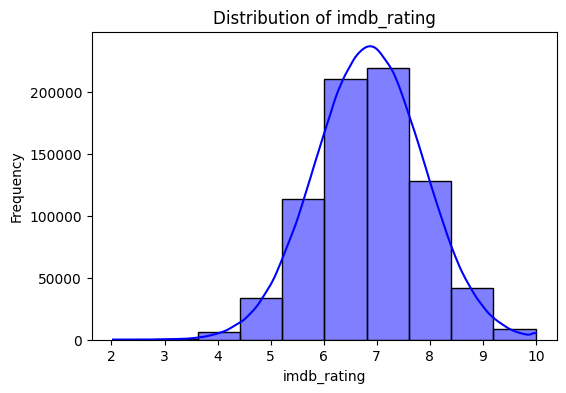

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


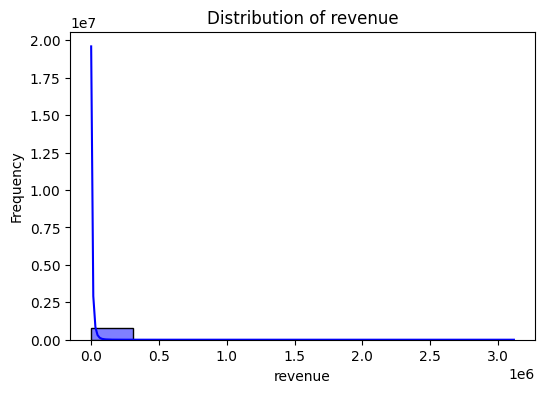

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


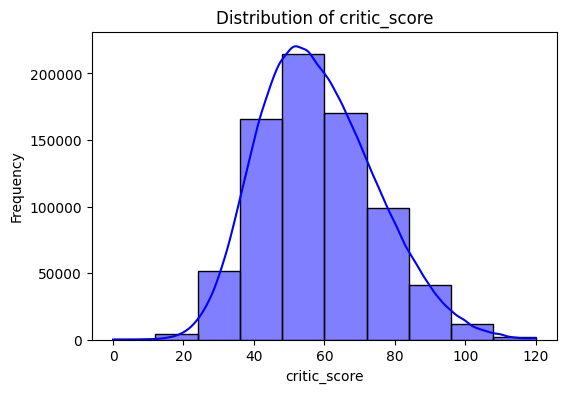

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


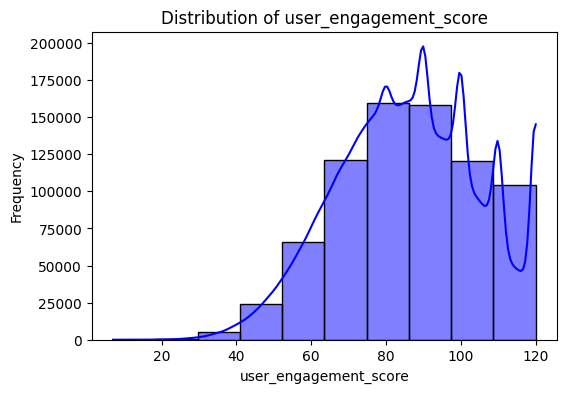

In [230]:
attributes = ['budget', 'imdb_rating', 'revenue','critic_score','user_engagement_score']

for i in attributes:
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.histplot(train[i], bins=10, kde=True, color='blue')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {i}')
    plt.show()

In [231]:
attributes = ['budget', 'imdb_rating', 'revenue','critic_score','user_engagement_score']
for i in attributes:
    print(i,':',train[i].skew())

budget : 19.76084657462368
imdb_rating : -0.00727853719217214
revenue : 28.21350438793198
critic_score : 0.3948912187781669
user_engagement_score : -0.15272418208131416


Since there are around 2 million rows with missing /null values, instead of dropping them we will imputate the missing data.

We will check skew and decide if we are to imputate with mean or median of the attributes.

We will drop the records which have null values for user_retention (label)

In [232]:
train = train.dropna(subset=['user_retention'])

As we can see, the attributes budget and revenue are positively skewed. (imputate with median)

The rest are fairly symmetrical. (imputate with mean)

In [233]:
attributes = ['budget','revenue']
for i in attributes:
    median_value = train[i].median()
    train[i] = train[i].fillna(median_value)

attributes = ['imdb_rating','critic_score','user_engagement_score']
for i in attributes:
    mean_value = train[i].mean()
    train[i] = train[i].fillna(mean_value)


In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760079 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             760079 non-null  int64  
 1   title                  760079 non-null  object 
 2   content_type           760079 non-null  object 
 3   genre                  760079 non-null  object 
 4   sub_genre              760079 non-null  object 
 5   release_year           760079 non-null  int64  
 6   language               760079 non-null  object 
 7   country_of_origin      760079 non-null  object 
 8   content_age_rating     760079 non-null  object 
 9   budget                 760079 non-null  float64
 10  runtime                760079 non-null  float64
 11  imdb_rating            760079 non-null  float64
 12  streamly_rating        760079 non-null  float64
 13  completion_rate        760079 non-null  float64
 14  total_views            760079 non-null  f

In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146967 entries, 0 to 146966
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             146967 non-null  int64  
 1   title                  146967 non-null  object 
 2   content_type           146967 non-null  object 
 3   genre                  146967 non-null  object 
 4   sub_genre              146967 non-null  object 
 5   release_year           146967 non-null  int64  
 6   language               146967 non-null  object 
 7   country_of_origin      146967 non-null  object 
 8   content_age_rating     146967 non-null  object 
 9   budget                 146967 non-null  float64
 10  runtime                146967 non-null  float64
 11  imdb_rating            146967 non-null  float64
 12  streamly_rating        146967 non-null  float64
 13  completion_rate        146967 non-null  float64
 14  total_views            146967 non-nu

As we can see, the test set contains no missing / null values and hences does not need preprocessing.


# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

In [236]:
# Your code here, along with reasoning

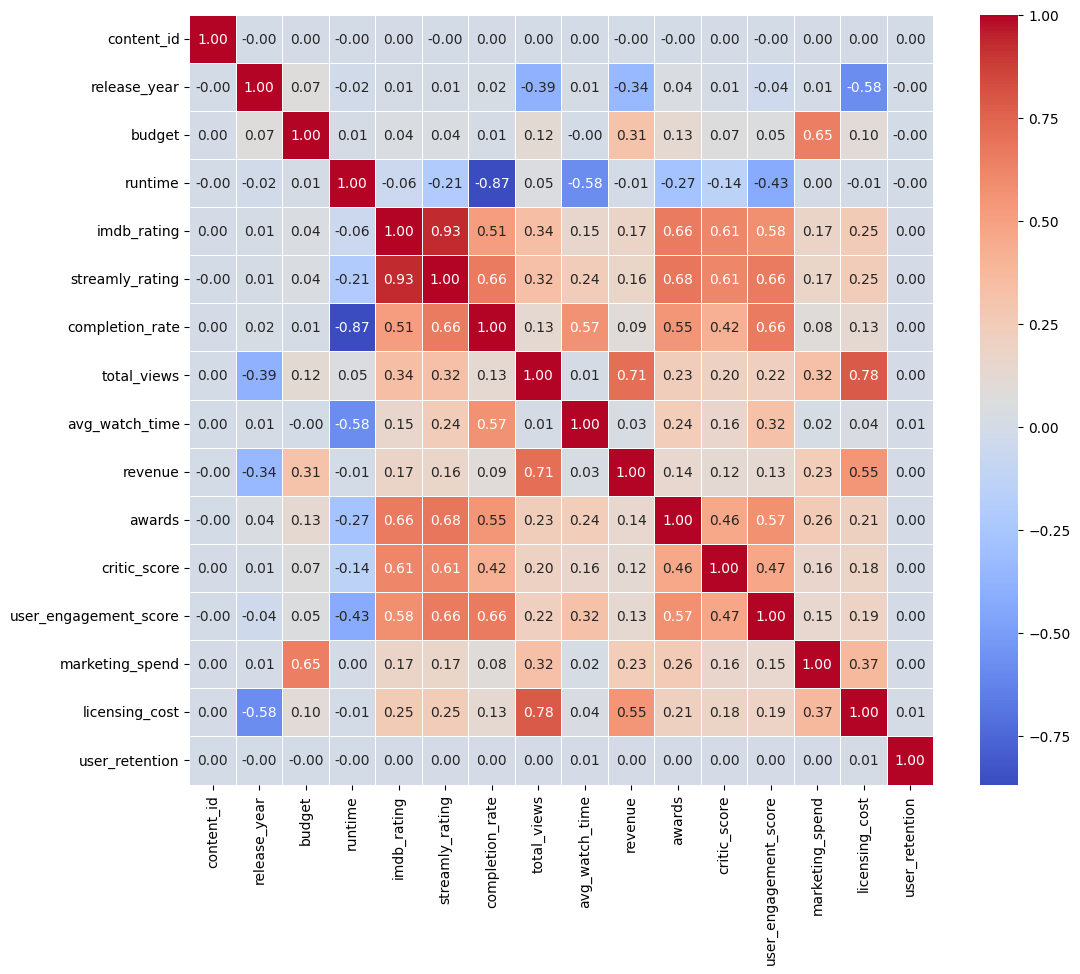

In [237]:

numerical_data = train.select_dtypes(include=['number'])

corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# High Positive Correlations :
1. IMDB Rating vs Streamly Rating (0.93): movies with higher imdb rating have a higher streamly rating or vice versa
2. Revenue vs Total Views (0.71): movies with more views have higher revenue or vice versa
3. Revenue vs Awards (0.71): Movies that win more awards are likely to generate higher revenue or vice versa

# High Negative Correlations :
1. Completion Rate vs Runtime (-0.87): movies with longer runtimes tend to have lower completion rates
2. Total Views vs Release Year (-0.39): more recent movies tend to have fewer total views
3. Completion Rate vs Avg Watch Time (-0.58): longer average watch times are associated with lower completion rates

# Counter-Intuitive and less obvious findings :
1. Total Views vs Release Year (-0.39)(intuitively we would think people would watch newer movies than older ones but these attributes are actually negatively correlated)
2. Licensing Cost vs Total Views (0.78)

# Anomalies:
1. Release year and Licensing cost is anomalous (-0.58). Ideally licensing cost should increase as the years progress



In [238]:
print(train.columns)

Index(['content_id', 'title', 'content_type', 'genre', 'sub_genre',
       'release_year', 'language', 'country_of_origin', 'content_age_rating',
       'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue', 'awards',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention'],
      dtype='object')


From these findings we take our new metric as :

### Audience Engagement Index (AEI)

**Formula:**

AEI=(Total views/ Total Runtime)*Streamly_rating

**Purpose:**

The Audience Engagement Index (AEI) measures how engaging the content is relative to its length and rating.

It helps to assess the effectiveness of the content in retaining viewers based on the total number of views and the Streamly rating.

Higher AEI values indicate greater engagement relative to the content's length and quality as perceived by users.

In [239]:
train['ROI'] = train['revenue'] / train['budget']
train['AEI'] = (train['total_views'] / (train['runtime'] )* train['streamly_rating'])

genre_roi = train.groupby('genre')['ROI'].mean().reset_index()
genre_roi.columns = ['Genre', 'Average_ROI']
print(genre_roi)
print()
genre_aei = train.groupby('genre')['AEI'].mean().reset_index()
genre_aei.columns = ['Genre', 'Average_AEI']
print("Average AEI by Genre:")
print(genre_aei)
print()
train.head()

      Genre  Average_ROI
0    Action     0.001077
1    Comedy     0.001421
2     Drama     0.001591
3   Romance     0.001812
4    Sci-Fi     0.001004
5  Thriller     0.001285

Average AEI by Genre:
      Genre  Average_AEI
0    Action   695.537719
1    Comedy   765.041536
2     Drama   564.642460
3   Romance   693.897277
4    Sci-Fi   642.230752
5  Thriller   633.298611



,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention,ROI,AEI
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,20.718243,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19,0.000420,264.321910
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,10.776592,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23,0.001228,2012.520806
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,7.577572e+06,...,11.376984,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15,0.000356,84.388366
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,6.219910,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08,0.001115,192.787528
5,606526,Augmenting in the Quantum Foam: The Baroque Ad...,Movie,Comedy,Mystery,2000,Spanish,Germany,PG-13,8.126704e+06,...,16.113432,5894.212335,2,49.463357,74.638589,2.124096e+06,6327.310398,2.896923e+09,0.000725,241.856985


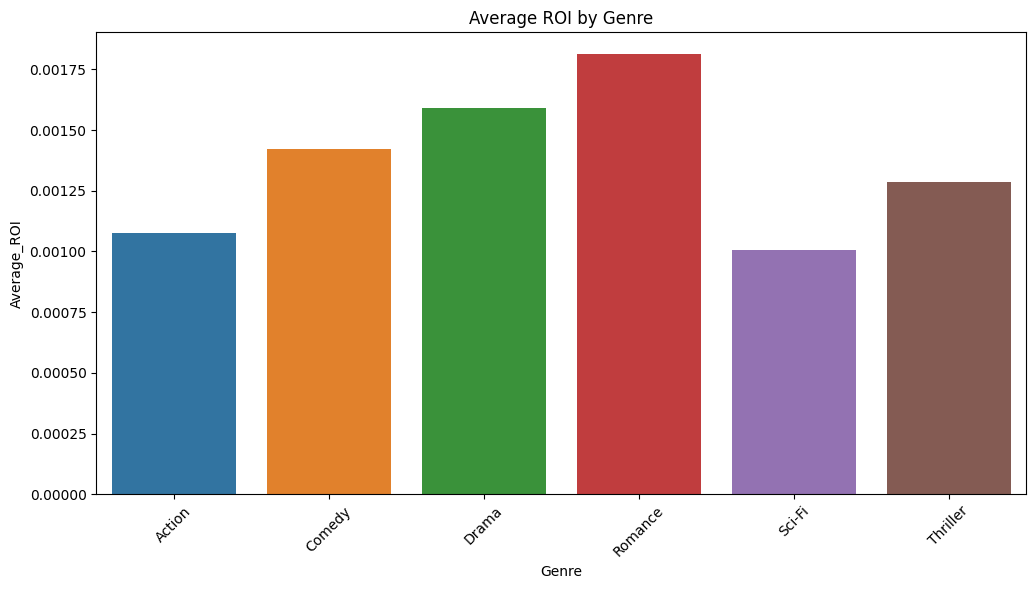

In [240]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Average_ROI', data=genre_roi)
plt.xticks(rotation=45)
plt.title('Average ROI by Genre')
plt.show()

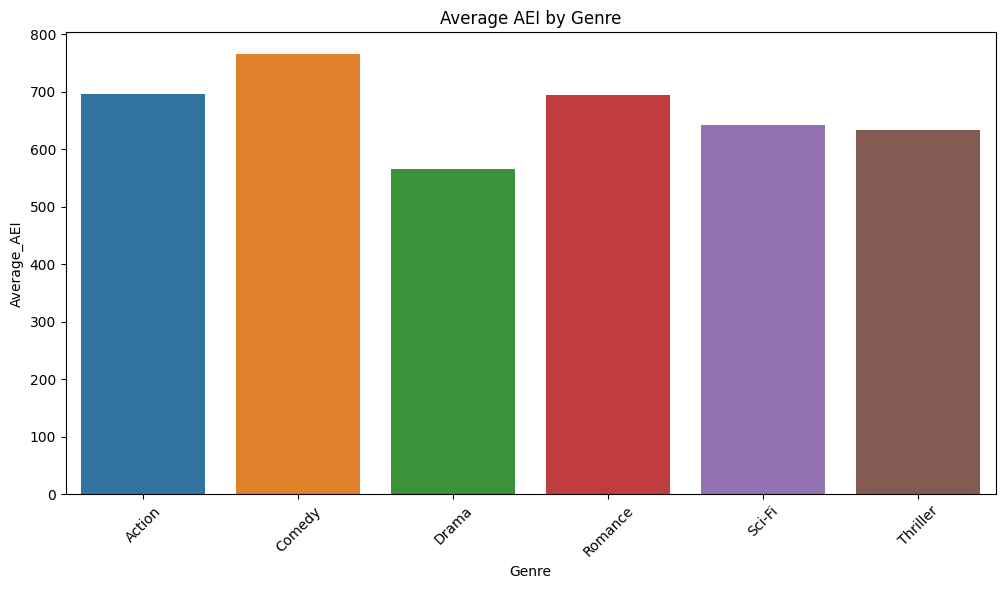

In [241]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Average_AEI', data=genre_aei)
plt.xticks(rotation=45)
plt.title('Average AEI by Genre')
plt.show()

# Task 3

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

In [242]:
# Your code here, along with reasoning
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['runtime', 'imdb_rating', 'streamly_rating', 'completion_rate',
                         'total_views', 'avg_watch_time', 'revenue', 'awards',
                         'critic_score', 'user_engagement_score', 'marketing_spend',
                         'licensing_cost','ROI','AEI']

train['user_retention_log'] = np.log1p(train['user_retention'])

scaler = MinMaxScaler(feature_range=(0, 100))
train['user_retention_normalized'] = scaler.fit_transform(train[['user_retention_log']])
print(train[['user_retention', 'user_retention_log', 'user_retention_normalized']].head())
train = train.drop(['user_retention', 'user_retention_log'], axis=1)

# Apply normalization
train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])

# Check the updated DataFrame
print(train.head())

   user_retention  user_retention_log  user_retention_normalized
0    4.910349e+19           45.340462                  53.350761
2    4.901917e+23           54.549083                  64.186270
3    1.672483e+15           35.053086                  41.245914
4    2.539603e+08           19.352688                  22.771728
5    2.896923e+09           21.786915                  25.636009
   content_id                                              title content_type  \
0      645543                             The Surreal Conspiracy  Documentary   
2      280014                  Synthesizing the Eternal Artifact        Movie   
3      215181                      The Artifact of Savage Zenith        Movie   
4      241683                   Resonating the Spectral Prophecy        Movie   
5      606526  Augmenting in the Quantum Foam: The Baroque Ad...        Movie   

     genre   sub_genre  release_year  language country_of_origin  \
0    Drama  Historical          2013   Spanish         

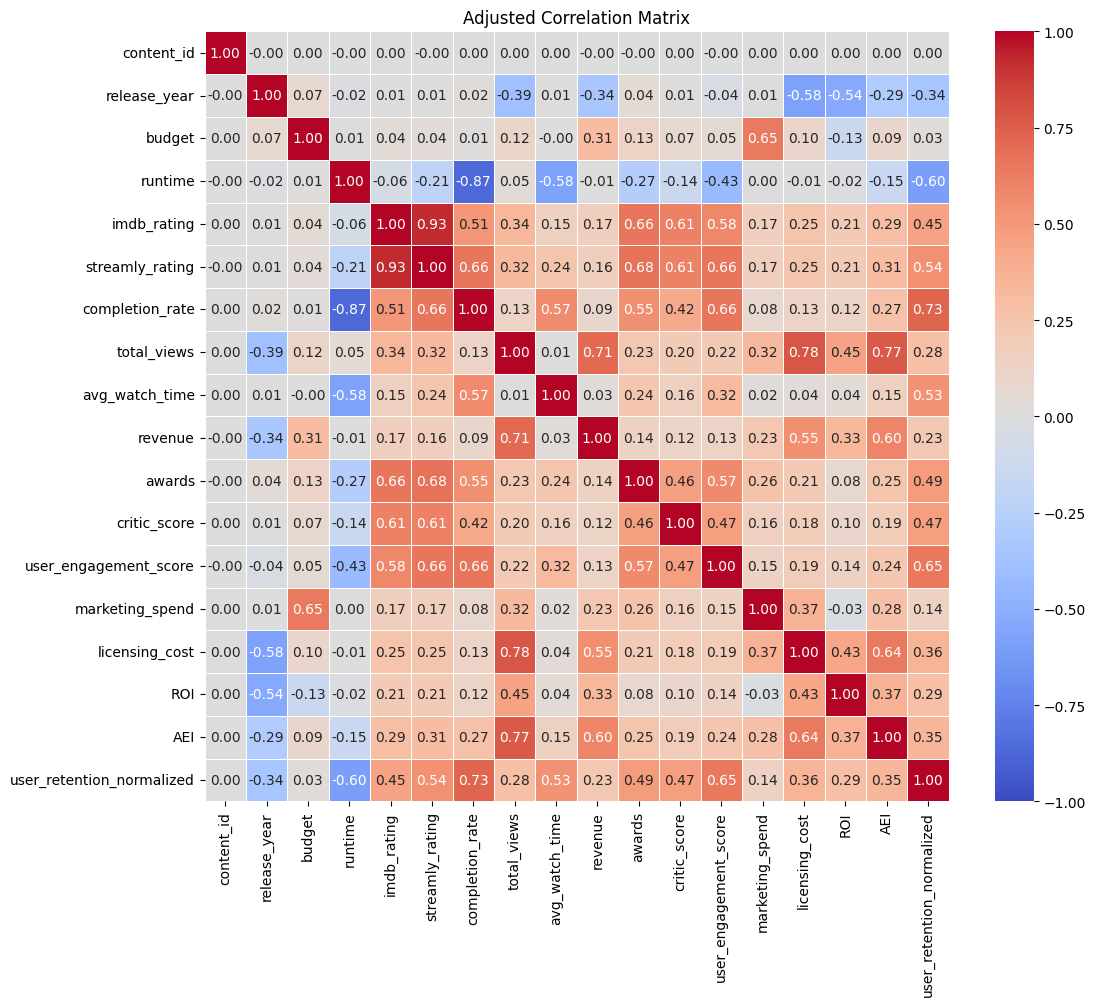

In [243]:
numeric_columns = train.select_dtypes(include=[np.number]).columns

correlation_matrix_adjusted = train[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_adjusted, annot=True, cmap='coolwarm', vmin=-1, vmax=1,fmt='.2f',linewidth=0.5)
plt.title('Adjusted Correlation Matrix')
plt.show()

To make adjustments to the variables, we normalize all the numerical attributes.

Normalization of numerical attributes is crucial as it standardizes features with different ranges and scales, ensuring that no single feature disproportionately influences the results. It improves convergence in algorithms by ensuring equal contribution from all features, facilitates easier comparison and interpretation of relationships between attributes, and prevents bias that could arise from features with varying scales.

# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

In [244]:
train=train.drop(["content_id","title","ROI","AEI"],axis=1)

In [245]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_encoder = LabelEncoder()
train['content_type'] = label_encoder.fit_transform(train['content_type'])

train['content_age_rating'] = train['content_age_rating'].astype(str)

ordinal_encoder = OrdinalEncoder(categories=[['G', 'PG', 'PG-13', 'R']])
train['content_age_rating'] = ordinal_encoder.fit_transform(train[['content_age_rating']])

for col in ['genre', 'sub_genre', 'language', 'country_of_origin']:
    freq_encoding = train[col].value_counts() / len(train)
    train[col] = train[col].map(freq_encoding)
    
print(train.head())

   content_type     genre  sub_genre  release_year  language  \
0             0  0.166692   0.166522          2013  0.200644   
2             1  0.165912   0.166962          2000  0.080190   
3             1  0.166742   0.166962          2019  0.399689   
4             1  0.166692   0.166522          1993  0.200644   
5             1  0.167439   0.166251          2000  0.200644   

   country_of_origin  content_age_rating        budget   runtime  imdb_rating  \
0           0.300024                 1.0  6.744258e+06  1.966455    75.388198   
2           0.300024                 1.0  1.588919e+07  2.699056    75.507678   
3           0.200216                 0.0  7.577572e+06  3.971468    67.410060   
4           0.300024                 2.0  1.518643e+07  3.084635    36.696774   
5           0.100233                 2.0  8.126704e+06  2.313476    51.952210   

   ...  avg_watch_time   revenue  awards  critic_score  user_engagement_score  \
0  ...       34.780649  0.090169    70.0     73

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Import these functions


X = train.drop(['user_retention_normalized'], axis=1) 
y = train['user_retention_normalized']

model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the training set
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Coefficients: [-4.69786981e-01  1.77618469e+02 -5.47521636e+00 -6.39108162e-01
 -1.10192784e+01  1.05307764e-03 -7.46286739e+00 -5.43859498e-10
 -2.32569911e-01  8.28842507e-02  1.03991958e-01  1.86863913e-01
 -9.33220275e-01  2.19371859e-01  1.21060955e-01  5.74064292e-02
  4.89127507e-02  1.98239045e-01  1.15237141e-02  1.91015661e-01
  1.56728819e-01  7.73450879e-01]
Intercept: 1257.7459102750377
Mean Squared Error (MSE): 42.938145639902636
R-squared: 0.8758789787990511


# Task 5
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

In [262]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146967 entries, 0 to 146966
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   release_year             146967 non-null  int64  
 1   budget                   146967 non-null  float64
 2   runtime                  146967 non-null  float64
 3   imdb_rating              146967 non-null  float64
 4   streamly_rating          146967 non-null  float64
 5   completion_rate          146967 non-null  float64
 6   total_views              146967 non-null  float64
 7   avg_watch_time           146967 non-null  float64
 8   revenue                  146967 non-null  float64
 9   awards                   146967 non-null  int64  
 10  critic_score             146967 non-null  float64
 11  user_engagement_score    146967 non-null  float64
 12  marketing_spend          146967 non-null  float64
 13  licensing_cost           146967 non-null  float64
 14  cont

In [261]:
# Your code here, along with reasoning
test_title = test['title']

categorical_cols = ['content_type', 'genre', 'sub_genre', 'language', 'country_of_origin', 'content_age_rating']
test = test.drop(['title','content_id','ROI','AEI'], axis=1)

for col in categorical_cols:
    freq = test[col].value_counts()
    test[col] = test[col].map(freq)

test = test.drop(categorical_cols, axis=1)

X_test = test

model = LinearRegression()
model.fit(X, y)

# X_test = sm.add_constant(X_test)
y_pred_test = model.predict(X_test)
print("Predicted User Retention:", y_pred_test)

KeyError: 'title'

In [248]:
submission = pd.DataFrame()
submission["title"] = test_title

In [249]:
sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv')

In [250]:
submission["user_retention"] = sample_submission["user_retention"]

In [251]:
submission.head()

,title,user_retention
0,Pulsating the Eternal Tale (AG4P),5.780032
1,Arcane Legend: A Spy Tale (NFVT),5.508571
2,The Neon Grimoire (9RHA),5.381187
3,Pulsating through the Dreamscape: The Mega Mirage,3.553894
4,The Turbo Enigma (D23S),7.666907


In [252]:
submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!**